In [1]:
from torchvision.models import resnet101, ResNet101_Weights
from torchvision.datasets import ImageFolder
import torch
from torchmetrics import Accuracy, F1Score, Precision, Recall
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset, ConcatDataset
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

In [2]:
data = ImageFolder('../data_retrieval/data_other', ResNet101_Weights.IMAGENET1K_V2.transforms())
targets = data.targets
train_indices, test_val_indices = train_test_split(np.arange(len(targets)), stratify=targets, train_size=0.65, random_state=21)
train_data = Subset(data, indices=train_indices)

In [3]:
val_test_data = Subset(data, indices=test_val_indices)
targets = np.array(targets)
test_val_targets = targets[test_val_indices]
test_indices, val_indices = train_test_split(test_val_indices, stratify=test_val_targets, train_size=0.57, random_state=21)
val_data, test_data = Subset(data, indices=val_indices), Subset(data, indices=test_indices)

In [4]:
print("Length of train set:", len(train_data))
print("Length of val set:", len(val_data))
print("Length of test set:", len(test_data))

Length of train set: 8299
Length of val set: 1922
Length of test set: 2547


In [5]:
model = resnet101()

In [6]:
model.load_state_dict(torch.load('../models/models_weights/resnet101_similar_signs.pth'))

<All keys matched successfully>

In [7]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [8]:
test_loader = torch.utils.data.DataLoader(test_data,
                                             batch_size=16, shuffle=True,
                                             num_workers=4)

In [9]:
print("Size of test dataset:", len(test_data))

Size of test dataset: 2547


In [10]:
idx_to_class = {v: k for k, v in test_data.dataset.class_to_idx.items()}

In [11]:
from collections import Counter
amount_of_samples = Counter()
for image, label in data:
    amount_of_samples[idx_to_class[label]]+=1


In [12]:
print(set(amount_of_samples))

{'GIŠ_Neo-Babylonian', 'UD_Neo-Assyrian', 'NU_Neo-Assyrian', 'NU_Neo-Babylonian', 'BAD_Neo-Babylonian', 'I_Neo-Assyrian', 'IGI_Neo-Assyrian', 'AN_Neo-Babylonian', 'A_Neo-Babylonian', 'AŠ_Neo-Babylonian', 'AN_Neo-Assyrian', 'DIŠ_Neo-Assyrian', 'ŠU₂_Neo-Babylonian', 'I_Neo-Babylonian', 'NA_Neo-Babylonian', 'AŠ_Neo-Assyrian', 'MU_Neo-Babylonian', 'ŠU₂_Neo-Assyrian', 'DIŠ_Neo-Babylonian', 'NA_Neo-Assyrian', 'BAD_Neo-Assyrian', 'MU_Neo-Assyrian', 'A_Neo-Assyrian', 'UD_Neo-Babylonian', 'MA_Neo-Assyrian', 'IGI_Neo-Babylonian', 'GIŠ_Neo-Assyrian', 'MA_Neo-Babylonian'}


In [13]:
class_counts = dict(sorted({label: amount_of_samples[label] for label in set(amount_of_samples)}.items(), key=lambda x: x[1], reverse=True))

In [14]:
class_counts

{'UD_Neo-Babylonian': 1352,
 'DIŠ_Neo-Babylonian': 1281,
 'AN_Neo-Babylonian': 1204,
 'NA_Neo-Babylonian': 1200,
 'A_Neo-Babylonian': 1140,
 'MU_Neo-Babylonian': 545,
 'MA_Neo-Babylonian': 544,
 'AŠ_Neo-Babylonian': 515,
 'ŠU₂_Neo-Babylonian': 417,
 'I_Neo-Babylonian': 377,
 'NU_Neo-Babylonian': 360,
 'AN_Neo-Assyrian': 353,
 'IGI_Neo-Babylonian': 325,
 'NA_Neo-Assyrian': 306,
 'DIŠ_Neo-Assyrian': 297,
 'UD_Neo-Assyrian': 282,
 'BAD_Neo-Assyrian': 257,
 'BAD_Neo-Babylonian': 239,
 'MA_Neo-Assyrian': 234,
 'GIŠ_Neo-Babylonian': 223,
 'IGI_Neo-Assyrian': 214,
 'A_Neo-Assyrian': 203,
 'AŠ_Neo-Assyrian': 192,
 'GIŠ_Neo-Assyrian': 167,
 'MU_Neo-Assyrian': 151,
 'ŠU₂_Neo-Assyrian': 150,
 'NU_Neo-Assyrian': 138,
 'I_Neo-Assyrian': 102}

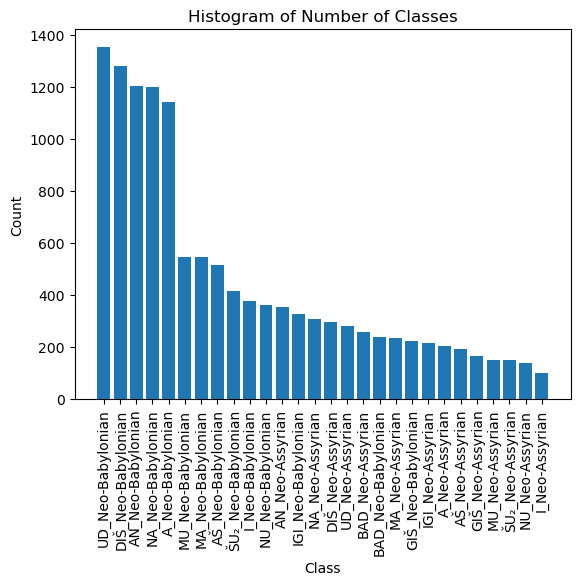

In [15]:
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Histogram of Number of Classes')
plt.xticks(rotation=90)
plt.show()

In [16]:
print(idx_to_class)

{0: 'AN_Neo-Assyrian', 1: 'AN_Neo-Babylonian', 2: 'A_Neo-Assyrian', 3: 'A_Neo-Babylonian', 4: 'AŠ_Neo-Assyrian', 5: 'AŠ_Neo-Babylonian', 6: 'BAD_Neo-Assyrian', 7: 'BAD_Neo-Babylonian', 8: 'DIŠ_Neo-Assyrian', 9: 'DIŠ_Neo-Babylonian', 10: 'GIŠ_Neo-Assyrian', 11: 'GIŠ_Neo-Babylonian', 12: 'IGI_Neo-Assyrian', 13: 'IGI_Neo-Babylonian', 14: 'I_Neo-Assyrian', 15: 'I_Neo-Babylonian', 16: 'MA_Neo-Assyrian', 17: 'MA_Neo-Babylonian', 18: 'MU_Neo-Assyrian', 19: 'MU_Neo-Babylonian', 20: 'NA_Neo-Assyrian', 21: 'NA_Neo-Babylonian', 22: 'NU_Neo-Assyrian', 23: 'NU_Neo-Babylonian', 24: 'UD_Neo-Assyrian', 25: 'UD_Neo-Babylonian', 26: 'ŠU₂_Neo-Assyrian', 27: 'ŠU₂_Neo-Babylonian'}


In [17]:
data, labels = next(iter(test_loader))

In [18]:
correct_pred = {classname: 0 for classname in idx_to_class}
total_pred = {classname: 0 for classname in idx_to_class}
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if idx_to_class[int(label)] == idx_to_class[(int(prediction))]:
                correct_pred[int(label)] += 1
            total_pred[int(label)] += 1

In [19]:
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {idx_to_class[classname]:5s} is {accuracy:.1f} %')

Accuracy for class: AN_Neo-Assyrian is 66.2 %
Accuracy for class: AN_Neo-Babylonian is 90.8 %
Accuracy for class: A_Neo-Assyrian is 75.6 %
Accuracy for class: A_Neo-Babylonian is 90.7 %
Accuracy for class: AŠ_Neo-Assyrian is 76.3 %
Accuracy for class: AŠ_Neo-Babylonian is 84.5 %
Accuracy for class: BAD_Neo-Assyrian is 82.4 %
Accuracy for class: BAD_Neo-Babylonian is 91.7 %
Accuracy for class: DIŠ_Neo-Assyrian is 84.7 %
Accuracy for class: DIŠ_Neo-Babylonian is 91.8 %
Accuracy for class: GIŠ_Neo-Assyrian is 93.9 %
Accuracy for class: GIŠ_Neo-Babylonian is 86.7 %
Accuracy for class: IGI_Neo-Assyrian is 69.8 %
Accuracy for class: IGI_Neo-Babylonian is 89.2 %
Accuracy for class: I_Neo-Assyrian is 81.0 %
Accuracy for class: I_Neo-Babylonian is 97.3 %
Accuracy for class: MA_Neo-Assyrian is 87.2 %
Accuracy for class: MA_Neo-Babylonian is 78.7 %
Accuracy for class: MU_Neo-Assyrian is 86.7 %
Accuracy for class: MU_Neo-Babylonian is 90.8 %
Accuracy for class: NA_Neo-Assyrian is 90.2 %
Accuracy f

In [20]:
print("Overall accuracy: ",sum(correct_pred.values()) / sum(total_pred.values()))

Overall accuracy:  0.8861405575186494


In [21]:
true_values = torch.zeros(len(test_data), dtype=torch.int64)
preds = torch.zeros(len(test_data), 1000)
counter = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        for pred,label  in zip(outputs, labels):
            preds[counter] = pred
            true_values[counter] = int(label)
            counter += 1
            

In [22]:
accuracy_2 = Accuracy('multiclass', num_classes=1000, top_k=2)
accuracy_3 = Accuracy('multiclass', num_classes=1000, top_k=3)
top_2 = accuracy_2(preds, true_values)
top_3 = accuracy_3(preds, true_values)
print("Overall Top-2 accuracy: ",float(top_2))
print("Overall Top-3 accuracy: ",float(top_3))

Overall Top-2 accuracy:  0.9454259872436523
Overall Top-3 accuracy:  0.9689831137657166


In [23]:
cf_matrix = confusion_matrix(true_values, torch.max(preds,1)[1])
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [idx_to_class[i] for i in idx_to_class],
                    columns = [idx_to_class[i] for i in idx_to_class])

In [24]:
df_cm

,AN_Neo-Assyrian,AN_Neo-Babylonian,A_Neo-Assyrian,A_Neo-Babylonian,AŠ_Neo-Assyrian,AŠ_Neo-Babylonian,BAD_Neo-Assyrian,BAD_Neo-Babylonian,DIŠ_Neo-Assyrian,DIŠ_Neo-Babylonian,...,MU_Neo-Assyrian,MU_Neo-Babylonian,NA_Neo-Assyrian,NA_Neo-Babylonian,NU_Neo-Assyrian,NU_Neo-Babylonian,UD_Neo-Assyrian,UD_Neo-Babylonian,ŠU₂_Neo-Assyrian,ŠU₂_Neo-Babylonian
AN_Neo-Assyrian,0.661972,0.225352,0.000000,0.000000,0.014085,0.000000,0.014085,0.000000,0.014085,0.000000,...,0.014085,0.000000,0.000000,0.000000,0.014085,0.000000,0.000000,0.000000,0.000000,0.000000
AN_Neo-Babylonian,0.000000,0.908333,0.000000,0.000000,0.004167,0.012500,0.004167,0.008333,0.000000,0.004167,...,0.000000,0.008333,0.000000,0.012500,0.000000,0.000000,0.000000,0.004167,0.000000,0.008333
A_Neo-Assyrian,0.000000,0.000000,0.756098,0.073171,0.024390,0.000000,0.024390,0.000000,0.121951,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A_Neo-Babylonian,0.000000,0.030837,0.000000,0.907489,0.000000,0.000000,0.004405,0.000000,0.004405,0.039648,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008811
AŠ_Neo-Assyrian,0.052632,0.000000,0.000000,0.000000,0.763158,0.078947,0.000000,0.000000,0.026316,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000
AŠ_Neo-Babylonian,0.000000,0.019417,0.000000,0.000000,0.058252,0.844660,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.009709,0.000000,0.009709,0.000000,0.019417,0.000000,0.000000,0.000000,0.038835
BAD_Neo-Assyrian,0.039216,0.000000,0.000000,0.000000,0.000000,0.000000,0.823529,0.039216,0.000000,0.000000,...,0.039216,0.000000,0.000000,0.000000,0.000000,0.019608,0.019608,0.000000,0.000000,0.019608
BAD_Neo-Babylonian,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020833,0.916667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.020833,0.000000,0.000000,0.000000,0.041667
DIŠ_Neo-Assyrian,0.000000,0.000000,0.000000,0.000000,0.033898,0.000000,0.000000,0.000000,0.847458,0.050847,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016949,0.000000,0.000000,0.016949
DIŠ_Neo-Babylonian,0.000000,0.019608,0.000000,0.003922,0.000000,0.003922,0.000000,0.007843,0.003922,0.917647,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023529,0.000000,0.011765


In [25]:
cm_dict = df_cm.to_dict()

In [26]:
print(cm_dict)

{'AN_Neo-Assyrian': {'AN_Neo-Assyrian': 0.6619718309859155, 'AN_Neo-Babylonian': 0.0, 'A_Neo-Assyrian': 0.0, 'A_Neo-Babylonian': 0.0, 'AŠ_Neo-Assyrian': 0.05263157894736842, 'AŠ_Neo-Babylonian': 0.0, 'BAD_Neo-Assyrian': 0.0392156862745098, 'BAD_Neo-Babylonian': 0.0, 'DIŠ_Neo-Assyrian': 0.0, 'DIŠ_Neo-Babylonian': 0.0, 'GIŠ_Neo-Assyrian': 0.0, 'GIŠ_Neo-Babylonian': 0.0, 'IGI_Neo-Assyrian': 0.0, 'IGI_Neo-Babylonian': 0.0, 'I_Neo-Assyrian': 0.0, 'I_Neo-Babylonian': 0.0, 'MA_Neo-Assyrian': 0.0, 'MA_Neo-Babylonian': 0.0, 'MU_Neo-Assyrian': 0.0, 'MU_Neo-Babylonian': 0.0, 'NA_Neo-Assyrian': 0.01639344262295082, 'NA_Neo-Babylonian': 0.0041841004184100415, 'NU_Neo-Assyrian': 0.037037037037037035, 'NU_Neo-Babylonian': 0.0, 'UD_Neo-Assyrian': 0.0, 'UD_Neo-Babylonian': 0.0, 'ŠU₂_Neo-Assyrian': 0.03333333333333333, 'ŠU₂_Neo-Babylonian': 0.0}, 'AN_Neo-Babylonian': {'AN_Neo-Assyrian': 0.22535211267605634, 'AN_Neo-Babylonian': 0.9083333333333333, 'A_Neo-Assyrian': 0.0, 'A_Neo-Babylonian': 0.03083700440

<Axes: >

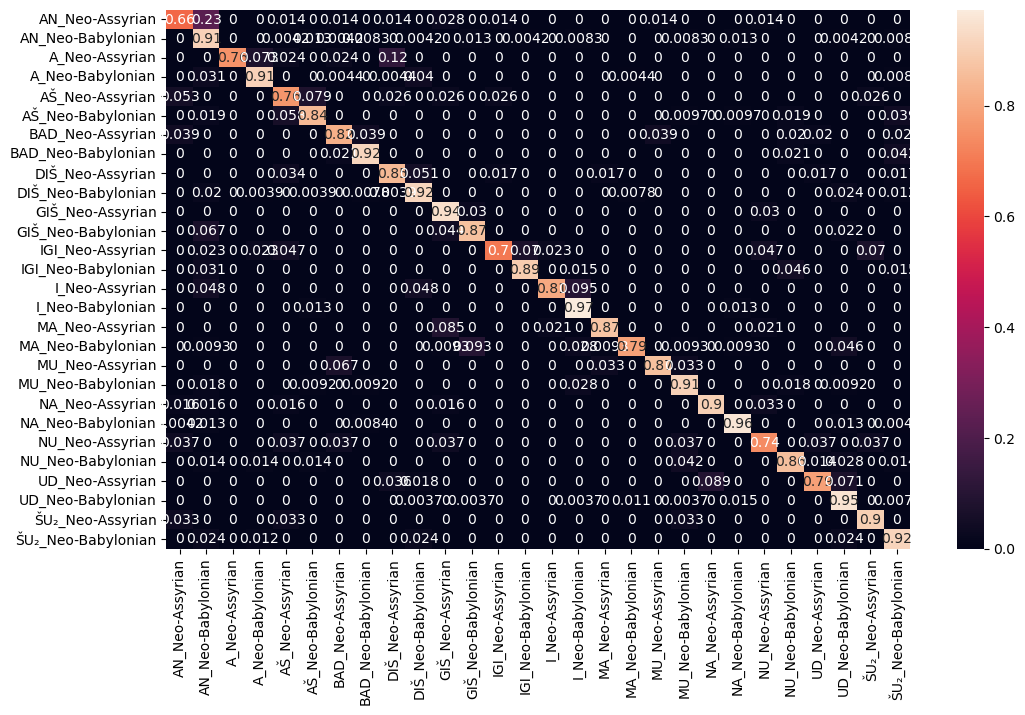

In [27]:
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

In [30]:
precision = Precision('multiclass',num_classes=28,average='none')

In [31]:
precision_each_class = precision(torch.max(preds,1)[1], true_values)

In [32]:
print(precision_each_class)

tensor([0.8545, 0.8226, 1.0000, 0.9671, 0.6444, 0.8969, 0.8400, 0.8302, 0.8197,
        0.9286, 0.7209, 0.7222, 0.9091, 0.9355, 0.8947, 0.8588, 0.9318, 0.9341,
        0.8966, 0.9000, 0.9167, 0.9582, 0.7407, 0.8732, 0.9167, 0.9113, 0.8438,
        0.7917])
